In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.metrics import mean_squared_error

from scipy.stats import pearsonr

In [2]:
df = pd.read_csv(r'data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.drop(['id', 'date'], axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
X_cols = list(df.columns)
X_cols.remove('price')
X_cols.remove('zipcode')
X_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

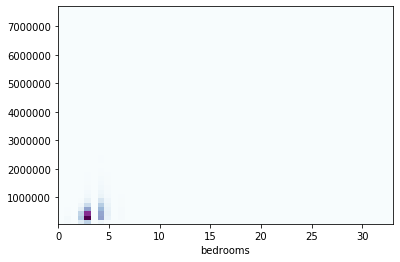

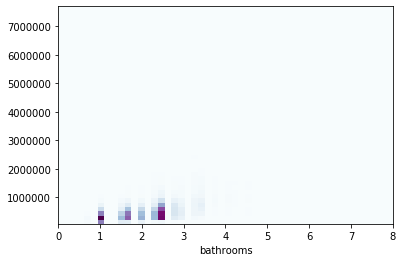

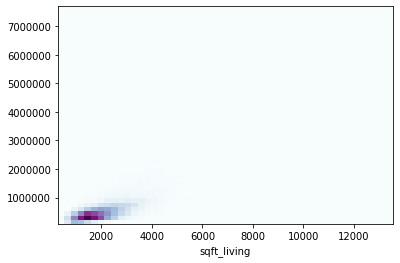

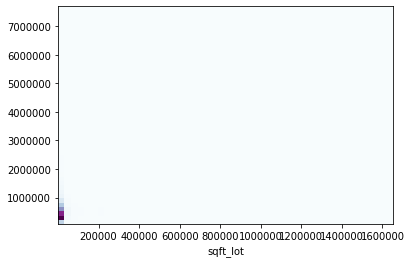

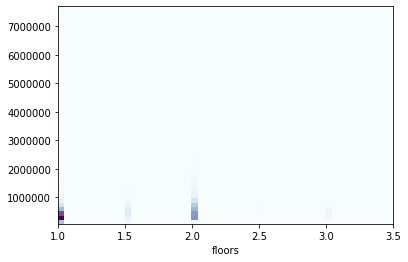

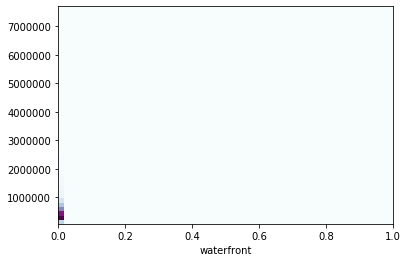

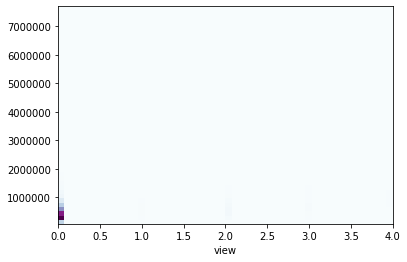

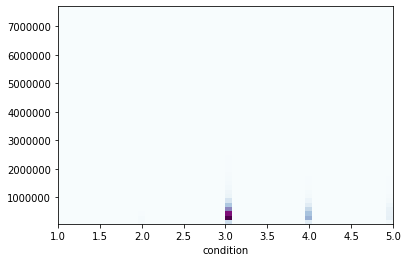

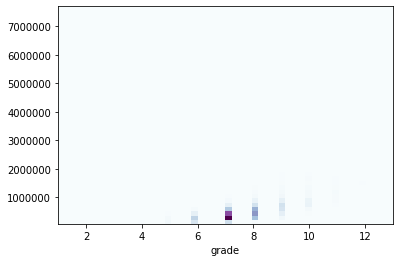

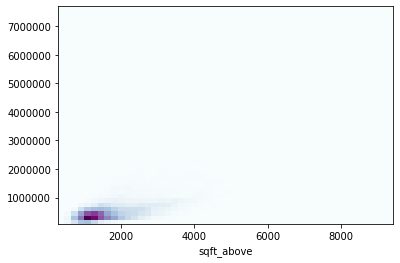

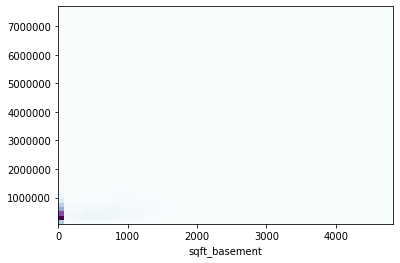

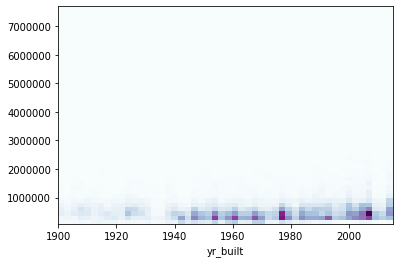

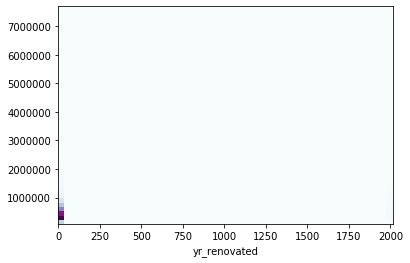

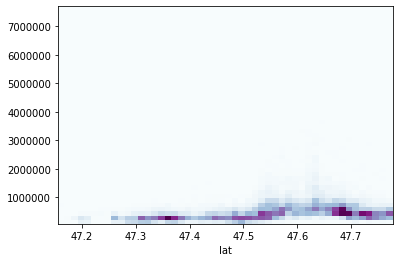

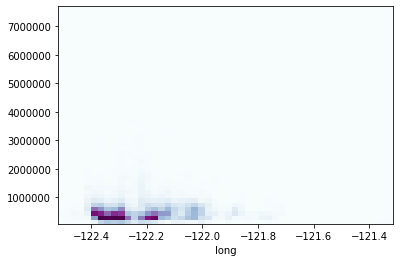

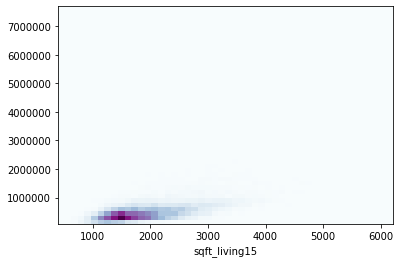

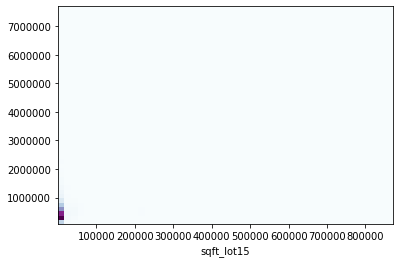

In [5]:
for col in X_cols:
    plt.hist2d(x = df[col], y = df['price'], bins = (50, 50), cmap=plt.cm.BuPu)
    plt.xlabel(col)
    plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[X_cols], df['price'], random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16209, 17), (5404, 17), (16209,), (5404,))

In [7]:
models = []
models.append(LinearRegression())
models.append(Lasso(tol = 0.085))
models.append(Ridge())
models.append(RandomForestRegressor())
models.append(GradientBoostingRegressor())
models.append(XGBRegressor())

In [8]:
for model in models:
    print(model)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = model.score(X_test, y_test)
    
    print('multiple R:', pearsonr(y_test, y_pred)[0])
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('score (R2):', r2)
    print()

LinearRegression()
multiple R: 0.8276014419058836
MSE: 50966495607.73318
score (R2): 0.6817008999882255

Lasso(tol=0.085)
multiple R: 0.8276019433931628
MSE: 50966577803.44598
score (R2): 0.6817003866544932

Ridge()
multiple R: 0.8276216482692789
MSE: 50967087979.54213
score (R2): 0.6816972004712896

RandomForestRegressor()
multiple R: 0.9347854347797864
MSE: 21377788610.02324
score (R2): 0.8664901168174508

GradientBoostingRegressor()
multiple R: 0.9273861085553179
MSE: 23400503815.31321
score (R2): 0.853857731134527

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=